In [ ]:
from google.colab import drive

drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd

actions = pd.read_excel('/content/drive/MyDrive/behavioral_data/tools&actionfeatures_pt_eng.xlsx')
features = pd.read_excel('/content/drive/MyDrive/behavioral_data/tools&features_pt_eng2.xlsx')

In [ ]:
lOfObjects = []
for e in list(features['Object Name'].unique()):
  lOfWord = []
  if str(e) != 'nan':
    for k in e.split('_'):
      if '/' in k :
        lOfWord.append(k.split('/')[0].lower().strip())
      else:
        lOfWord.append(k.lower().strip())
    lOfObjects.append(lOfWord)

In [ ]:
import numpy as np

# the preprocessed list of objects
def unique(list1):
    x = np.array(list1, dtype=object)

    return list(np.unique(x))
  
lOfObjects = unique(lOfObjects)

In [ ]:
lOfObjectsAct = []
for e in list(actions['Object Name'].unique()):
  lOfWord = []
  if str(e) != 'nan':
    for k in e.split('_'):
      if '/' in k :
        lOfWord.append(k.split('/')[0].lower().strip())
      else:
        lOfWord.append(k.lower().strip())
    lOfObjectsAct.append(lOfWord)
lOfObjectsAct = unique(lOfObjectsAct)

In [ ]:
import gensim.downloader as api

# load one of the Glove pretrained models
word_vectors = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


In [ ]:
from scipy.stats import zscore

def RDM(resp):
  """Compute the representational dissimilarity matrix (RDM)
  Args:
    resp (ndarray): S x N matrix with population responses to
      each stimulus in each row
  Returns:
    ndarray: S x S representational dissimilarity matrix
  """

  # z-score responses to each stimulus
  zresp = zscore(resp, axis=1)

  # Compute RDM
  RDM = 1 - (zresp @ zresp.T) / zresp.shape[1]

  return RDM

In [ ]:
gVec = []
for e in lOfObjects:
  gVec.append(word_vectors[e][0])

In [ ]:
import numpy as np

SN = np.array(gVec)
SN.shape

(80, 200)

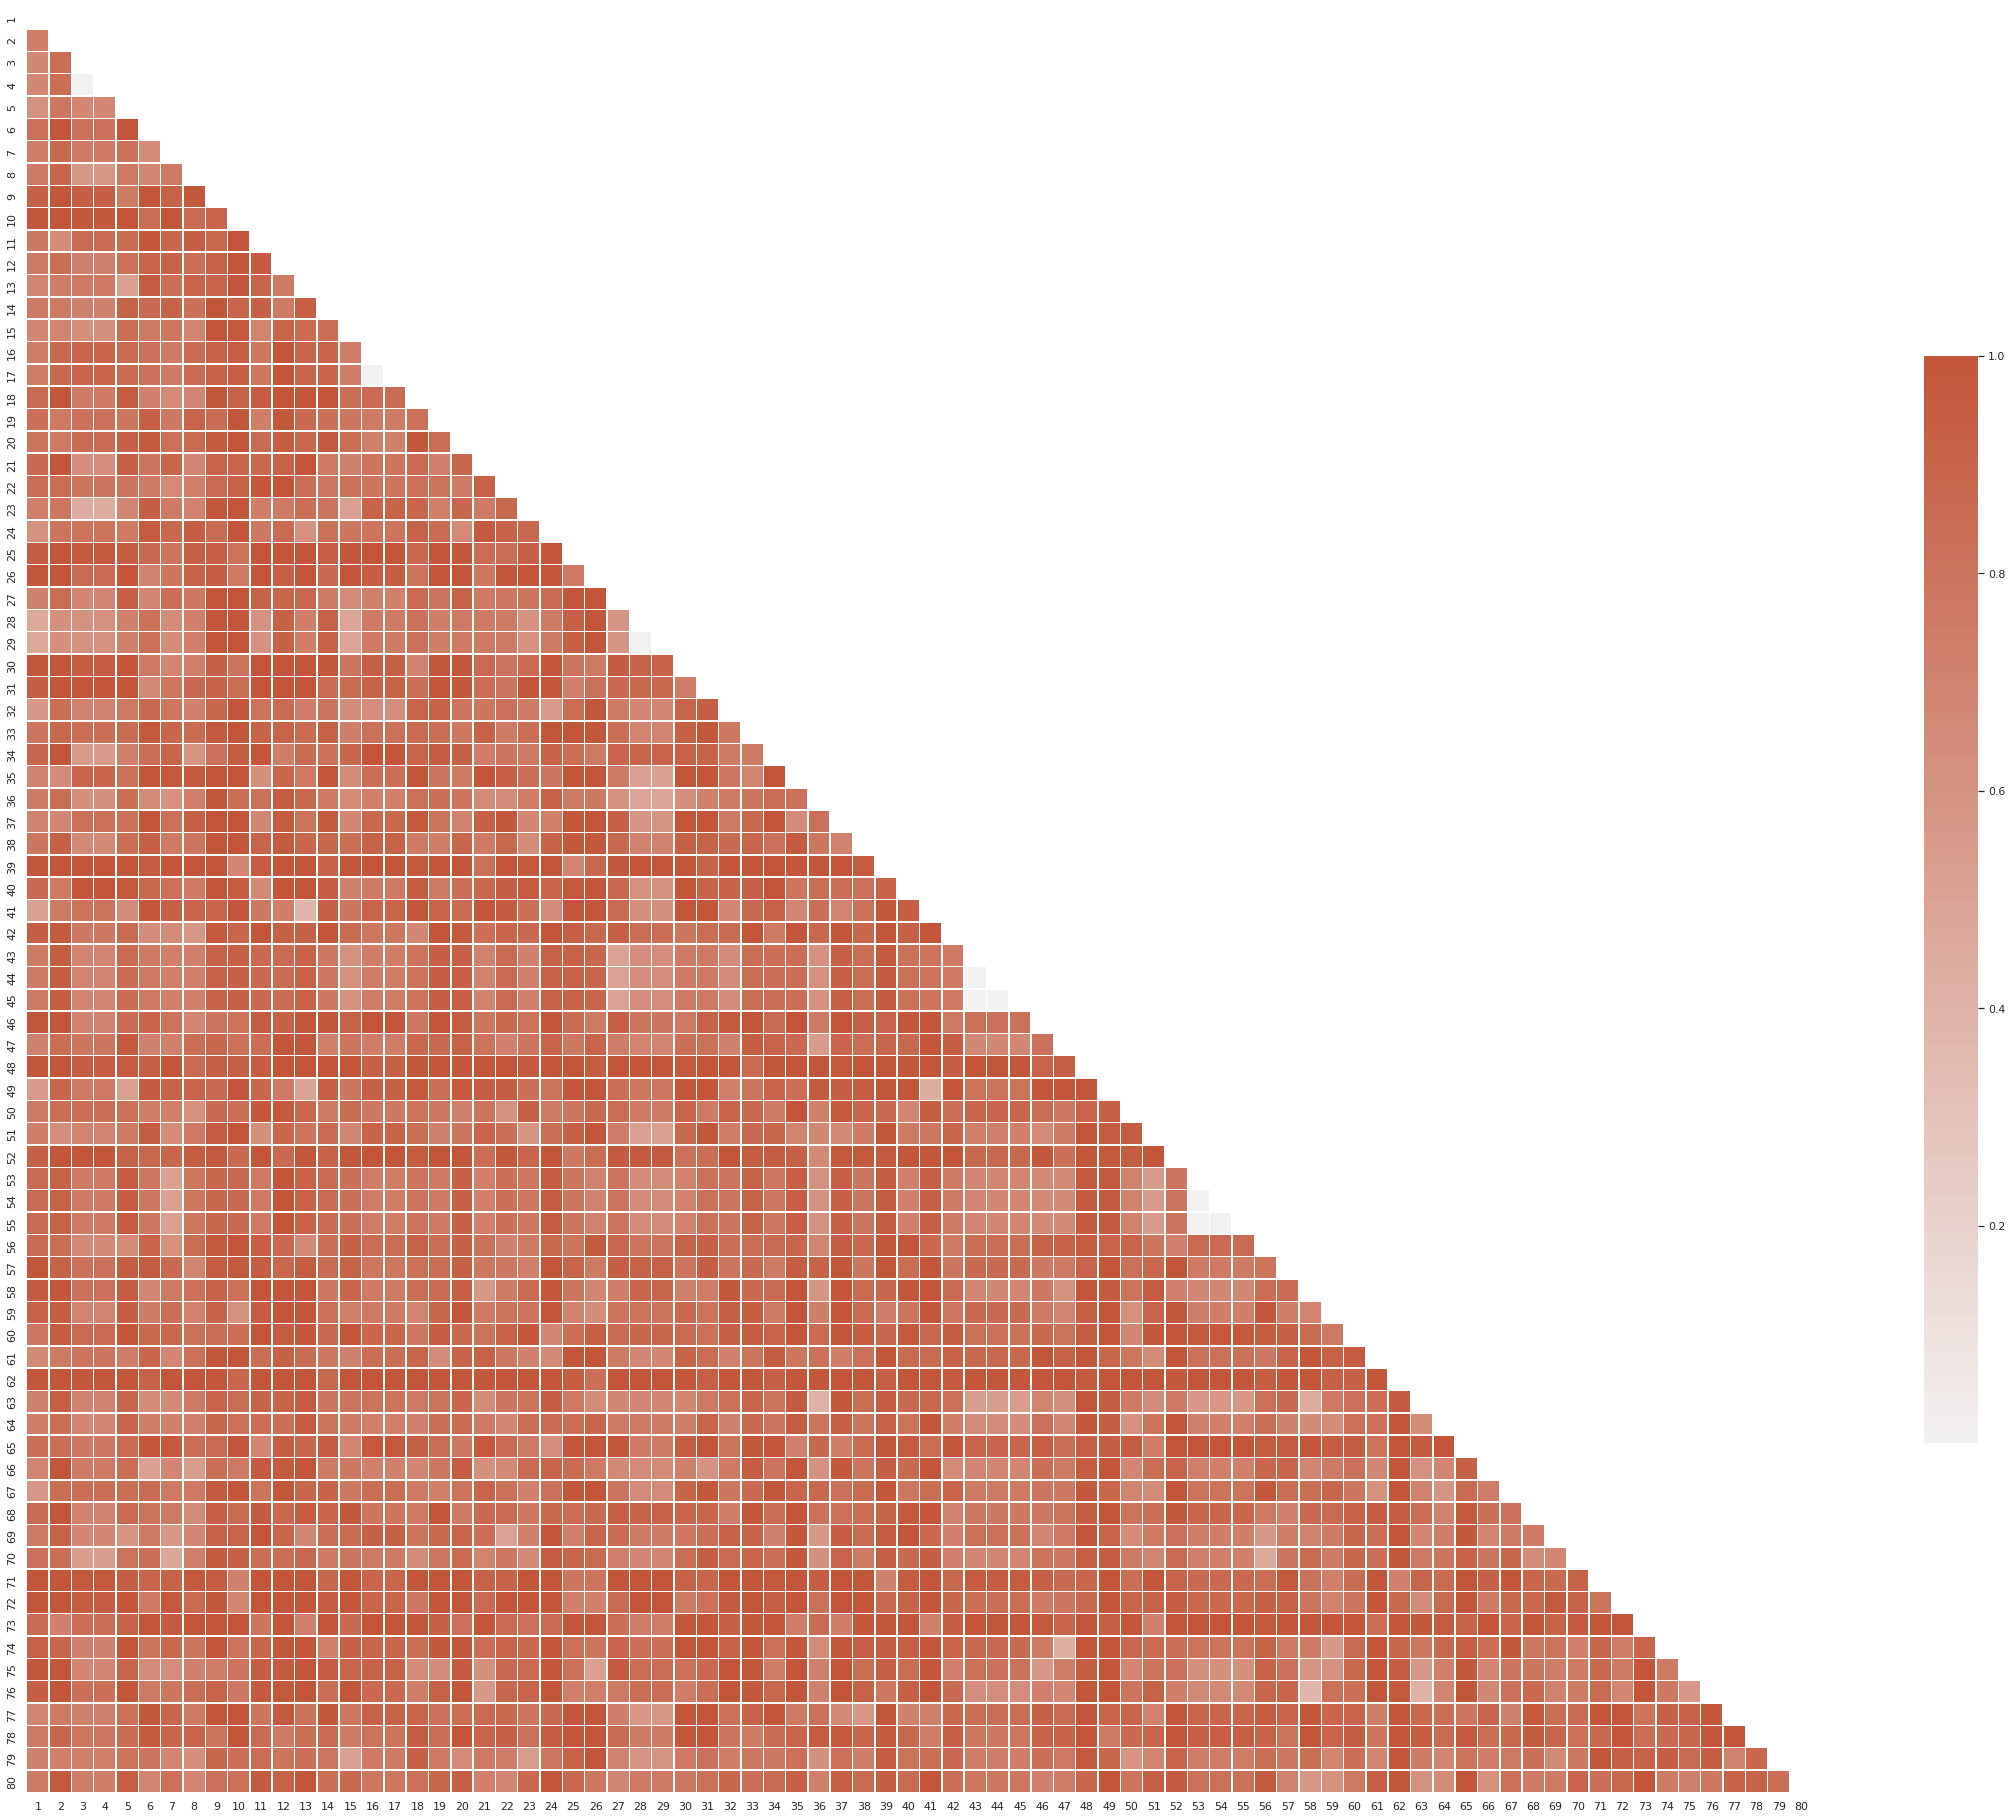

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d = pd.DataFrame(data=RDM(SN),
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('./RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# finding most similar words

In [ ]:
import itertools

lOfScores = []
for subset in itertools.permutations(lOfObjects, 2):
      dictOfSimilarities = {}
      dictOfSimilarities['obj1'] = subset[0]
      dictOfSimilarities['obj2'] = subset[1]
      dictOfSimilarities['dissim'] = 20 - word_vectors.wmdistance(subset[0], subset[1])
      lOfScores.append(dictOfSimilarities)

In [ ]:
len(lOfScores)

6320

In [ ]:
sortedListOfScores = sorted(lOfScores, key=lambda d: d['dissim']) 

for e in sortedListOfScores:
  print(e['dissim'], e['obj1'], e['obj2'])

Streaming output truncated to the last 5000 lines.
11.405531158409119 ['board', 'eraser'] ['lighter']
11.405531158409119 ['lighter'] ['board', 'eraser']
11.406080374624253 ['life', 'buoy'] ['match']
11.406080374624253 ['match'] ['life', 'buoy']
11.406769958322048 ['knife'] ['ruber', 'stamp']
11.406769958322048 ['ruber', 'stamp'] ['knife']
11.407701717078686 ['board', 'eraser'] ['whistle']
11.407701717078686 ['whistle'] ['board', 'eraser']
11.409534454345703 ['grater'] ['wrench']
11.409534454345703 ['wrench'] ['grater']
11.409612605196 ['board', 'eraser'] ['shopping', 'cart']
11.409612605196 ['shopping', 'cart'] ['board', 'eraser']
11.409977912902832 ['jug'] ['knife']
11.409977912902832 ['knife'] ['jug']
11.411655631127834 ['shopping', 'cart'] ['spoon']
11.411655631127834 ['spoon'] ['shopping', 'cart']
11.412182925805093 ['hole', 'punch'] ['syringe']
11.412182925805093 ['syringe'] ['hole', 'punch']
11.412199020385742 ['needle'] ['nutcracker']
11.412199020385742 ['nutcracker'] ['needle']

In [ ]:
# check the number of similar features

In [ ]:
# an example
EngFeatSpoon = features[features['Object Name'] == 'pencil_sharpener']['English feature '].unique()
EngFeatKnife = features[features['Object Name'] == 'pencil']['English feature '].unique()
dissimilarities1 = list(set(EngFeatSpoon) - set(EngFeatKnife))
dissimilarities2 = list(set(EngFeatKnife) - set(EngFeatSpoon))
similarities1 = list(set(EngFeatKnife) & set(EngFeatSpoon))

In [ ]:
print(len(dissimilarities1), len(dissimilarities2), len(similarities1))

17 20 9


In [ ]:
lSimDisObj = []

for subset in itertools.permutations(list(features['Object Name'].unique()), 2):
  if str(subset[0]) != 'nan' and str(subset[1]) != 'nan' and subset[0] != 'pencil ' and subset[1] != 'pencil ' and subset[0] != 'scissors ' and subset[1] != 'scissors ':
    dictOfSimDis = {}
    if '/' in subset[0]:  
      dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    elif '/' in subset[1]:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].split('/')[0].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    else:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])

    EngFeat1 = features[features['Object Name'] == subset[0]]['English feature '].unique()
    EngFeat2 = features[features['Object Name'] == subset[1]]['English feature '].unique()
    dissimilarities1 = list(set(EngFeat1) - set(EngFeat2))
    dissimilarities2 = list(set(EngFeat2) - set(EngFeat1))
    similarities = list(set(EngFeat1) & set(EngFeat2))
    lenDis1 = len(dissimilarities1)
    lenDis2 = len(dissimilarities2)
    lenSim = len(similarities)

    dictOfSimDis['dis1'] = dissimilarities1
    dictOfSimDis['dis2'] = dissimilarities2
    dictOfSimDis['sim'] = similarities
    dictOfSimDis['lenDis1'] = lenDis1
    dictOfSimDis['lenDis2'] = lenDis2
    dictOfSimDis['lenSim'] = lenSim

    lSimDisObj.append(dictOfSimDis)

In [ ]:
len(lSimDisObj)

6320

In [ ]:
import heapq

sortedListOfDisSim = sorted(lSimDisObj, key=lambda d: d['dissim']) 

lenSimList = []
dissimScoreList = []

for e in lSimDisObj:
  lenSimList.append(e['lenSim'])
  dissimScoreList.append(e['dissim'])

for c1, c2 in zip(heapq.nlargest(30, dissimScoreList),heapq.nlargest(30, lenSimList)):
    print(c1, '         ',c2)

1.2531495988368988           24
1.2531495988368988           24
1.24154794216156           21
1.24154794216156           21
1.231400951743126           19
1.231400951743126           19
1.2283124178647995           19
1.2283124178647995           19
1.2220142185688019           18
1.2220142185688019           18
1.2188730239868164           18
1.2188730239868164           18
1.212783232331276           18
1.212783232331276           18
1.2118707597255707           18
1.2118707597255707           18
1.2113372683525085           18
1.2113372683525085           18
1.2031957507133484           17
1.2031957507133484           17
1.2029960006475449           17
1.2029960006475449           17
1.1980238407850266           16
1.1980238407850266           16
1.1912754029035568           16
1.1912754029035568           16
1.1908639073371887           16
1.1908639073371887           16
1.19049771130085           16
1.19049771130085           16


In [ ]:
dissimLargest = heapq.nlargest(10, lSimDisObj, key=lambda s: s['dissim'])
lensimLargest = heapq.nlargest(10, lSimDisObj, key=lambda s: s['lenSim'])
for c1, c2 in zip(dissimLargest, lensimLargest):
    print(c1['dissim'], '   ', c2['dissim'])
    # print('***************************')
    print(c1['lenSim'], '   ', c2['lenSim'])
    # print('***************************')
    print(c1['obj1'], '   ', c2['obj1'])
    # print('***************************')
    print(c1['obj2'], '   ', c2['obj2'])
    print('***************************')

1.2531495988368988     0.4519100785255432
5     24
['match']     ['bottle']
['stapler']     ['glass']
***************************
1.2531495988368988     0.4519100785255432
5     24
['stapler']     ['glass']
['match']     ['bottle']
***************************
1.24154794216156     0.5008835196495056
6     21
['clothespin']     ['fork']
['cup']     ['spoon']
***************************
1.24154794216156     0.5008835196495056
6     21
['cup']     ['spoon']
['clothespin']     ['fork']
***************************
1.231400951743126     0.6427851021289825
6     19
['hairbrush']     ['broom']
['match']     ['mop']
***************************
1.231400951743126     0.8365983068943024
6     19
['match']     ['cup']
['hairbrush']     ['glass']
***************************
1.2283124178647995     0.8365983068943024
7     19
['cup']     ['glass']
['magnifier']     ['cup']
***************************
1.2283124178647995     0.6427851021289825
7     19
['magnifier']     ['mop']
['cup']     ['broom']
****

In [ ]:
# same procedure for actions

In [ ]:
lSimDisObj2 = []
for subset in itertools.permutations(list(actions['Object Name'].unique()), 2):
  if str(subset[0]) != 'nan' and str(subset[1]) != 'nan' \
  and subset[0] != 'bucket ' and subset[1] != 'bucket ' and subset[0] != 'bottle ' and subset[1] != 'bottle ':
    dictOfSimDis = {}
    if '/' in subset[0]:  
      dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    elif '/' in subset[1]:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].split('/')[0].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    else:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])

    EngFeat1 = actions[actions['Object Name'] == subset[0]]['English feature '].unique()
    EngFeat2 = actions[actions['Object Name'] == subset[1]]['English feature '].unique()
    dissimilarities1 = list(set(EngFeat1) - set(EngFeat2))
    dissimilarities2 = list(set(EngFeat2) - set(EngFeat1))
    similarities = list(set(EngFeat1) & set(EngFeat2))
    lenDis1 = len(dissimilarities1)
    lenDis2 = len(dissimilarities2)
    lenSim = len(similarities)

    dictOfSimDis['dis1'] = dissimilarities1
    dictOfSimDis['dis2'] = dissimilarities2
    dictOfSimDis['sim'] = similarities
    dictOfSimDis['lenDis1'] = lenDis1
    dictOfSimDis['lenDis2'] = lenDis2
    dictOfSimDis['lenSim'] = lenSim

    lSimDisObj2.append(dictOfSimDis)

In [ ]:
dissimLargest = heapq.nlargest(10, lSimDisObj2, key=lambda s: s['dissim'])
lensimLargest = heapq.nlargest(10, lSimDisObj2, key=lambda s: s['lenSim'])
for c1, c2 in zip(dissimLargest, lensimLargest):
    print(c1['dissim'], '     ', c2['dissim'])
    # print('***************************')
    print(c1['lenSim'], '     ', c2['lenSim'])
    # print('***************************')
    print(c1['obj1'], '     ', c2['obj1'])
    # print('***************************')
    print(c1['obj2'], '     ', c2['obj2'])
    print('***************************')

1.2531495988368988       0.7891179770231247
7       13
['match']       ['match']
['stapler']       ['nail', 'file']
***************************
1.2531495988368988       0.7891179770231247
7       13
['stapler']       ['nail', 'file']
['match']       ['match']
***************************
1.24154794216156       0.8456538766622543
9       12
['clothespin']       ['cup']
['cup']       ['fork']
***************************
1.24154794216156       0.9302730709314346
9       12
['cup']       ['dart']
['clothespin']       ['match']
***************************
1.231400951743126       0.818088948726654
7       12
['hairbrush']       ['dryer']
['match']       ['hand', 'fan']
***************************
1.231400951743126       0.6461508274078369
7       12
['match']       ['dryer']
['hairbrush']       ['toothbrush']
***************************
1.2283124178647995       0.8456538766622543
5       12
['cup']       ['fork']
['magnifier']       ['cup']
***************************
1.2283124178647995      

In [ ]:
# compute RDMs and RSA

In [ ]:
matOfDisFeat = np.empty([len(lOfObjects), len(lOfObjects)])

i = 0
j = 0
for e in lOfObjects:
  for item in lSimDisObj:
    if i == j:
        matOfDisFeat[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        matOfDisFeat[i, j] = 1 - (item['lenSim'] / (item['lenSim'] + item['lenDis1'] + item['lenDis2']))
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
matOfDisFeat[23,28]

0.9230769230769231

In [ ]:
matOfDisGlove = np.empty([len(lOfObjects), len(lOfObjects)])

i = 0
j = 0
for e in lOfObjects:
  for item in lSimDisObj:
    if i == j:
        matOfDisGlove[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        similarity = word_vectors.n_similarity(item['obj1'], item['obj2'])  
        matOfDisGlove[i, j] = 1 - similarity
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
matOfDisGlove[23,28]

1.0449903085827827

In [ ]:
#@title RDM Comparison functions

from scipy.stats import spearmanr

def RSA_spearman(rdm1,rdm2):
    """
    computes and returns the spearman correlation between lower triangular 
    part of the input rdms. We only need to compare either lower or upper 
    triangular part of the matrix as RDM is symmetric
    """
    # get lower triangular part of the RDM1 
    lt_rdm1 = get_lowertriangular(rdm1)
    # get lower triangular part of the RDM1 
    lt_rdm2 = get_lowertriangular(rdm2)
    # return Spearman's correlation between lower triangular part of rdm1 & rdm2
    return spearmanr(lt_rdm1, lt_rdm2)[0]

def get_lowertriangular(rdm):
    """
    returns lower triangular part of the matrix
    """
    num_conditions = rdm.shape[0]
    return rdm[np.tril_indices(num_conditions,-1)]

In [ ]:
RSA = RSA_spearman(matOfDisGlove, matOfDisFeat)

In [ ]:
RSA

0.13441870800528788

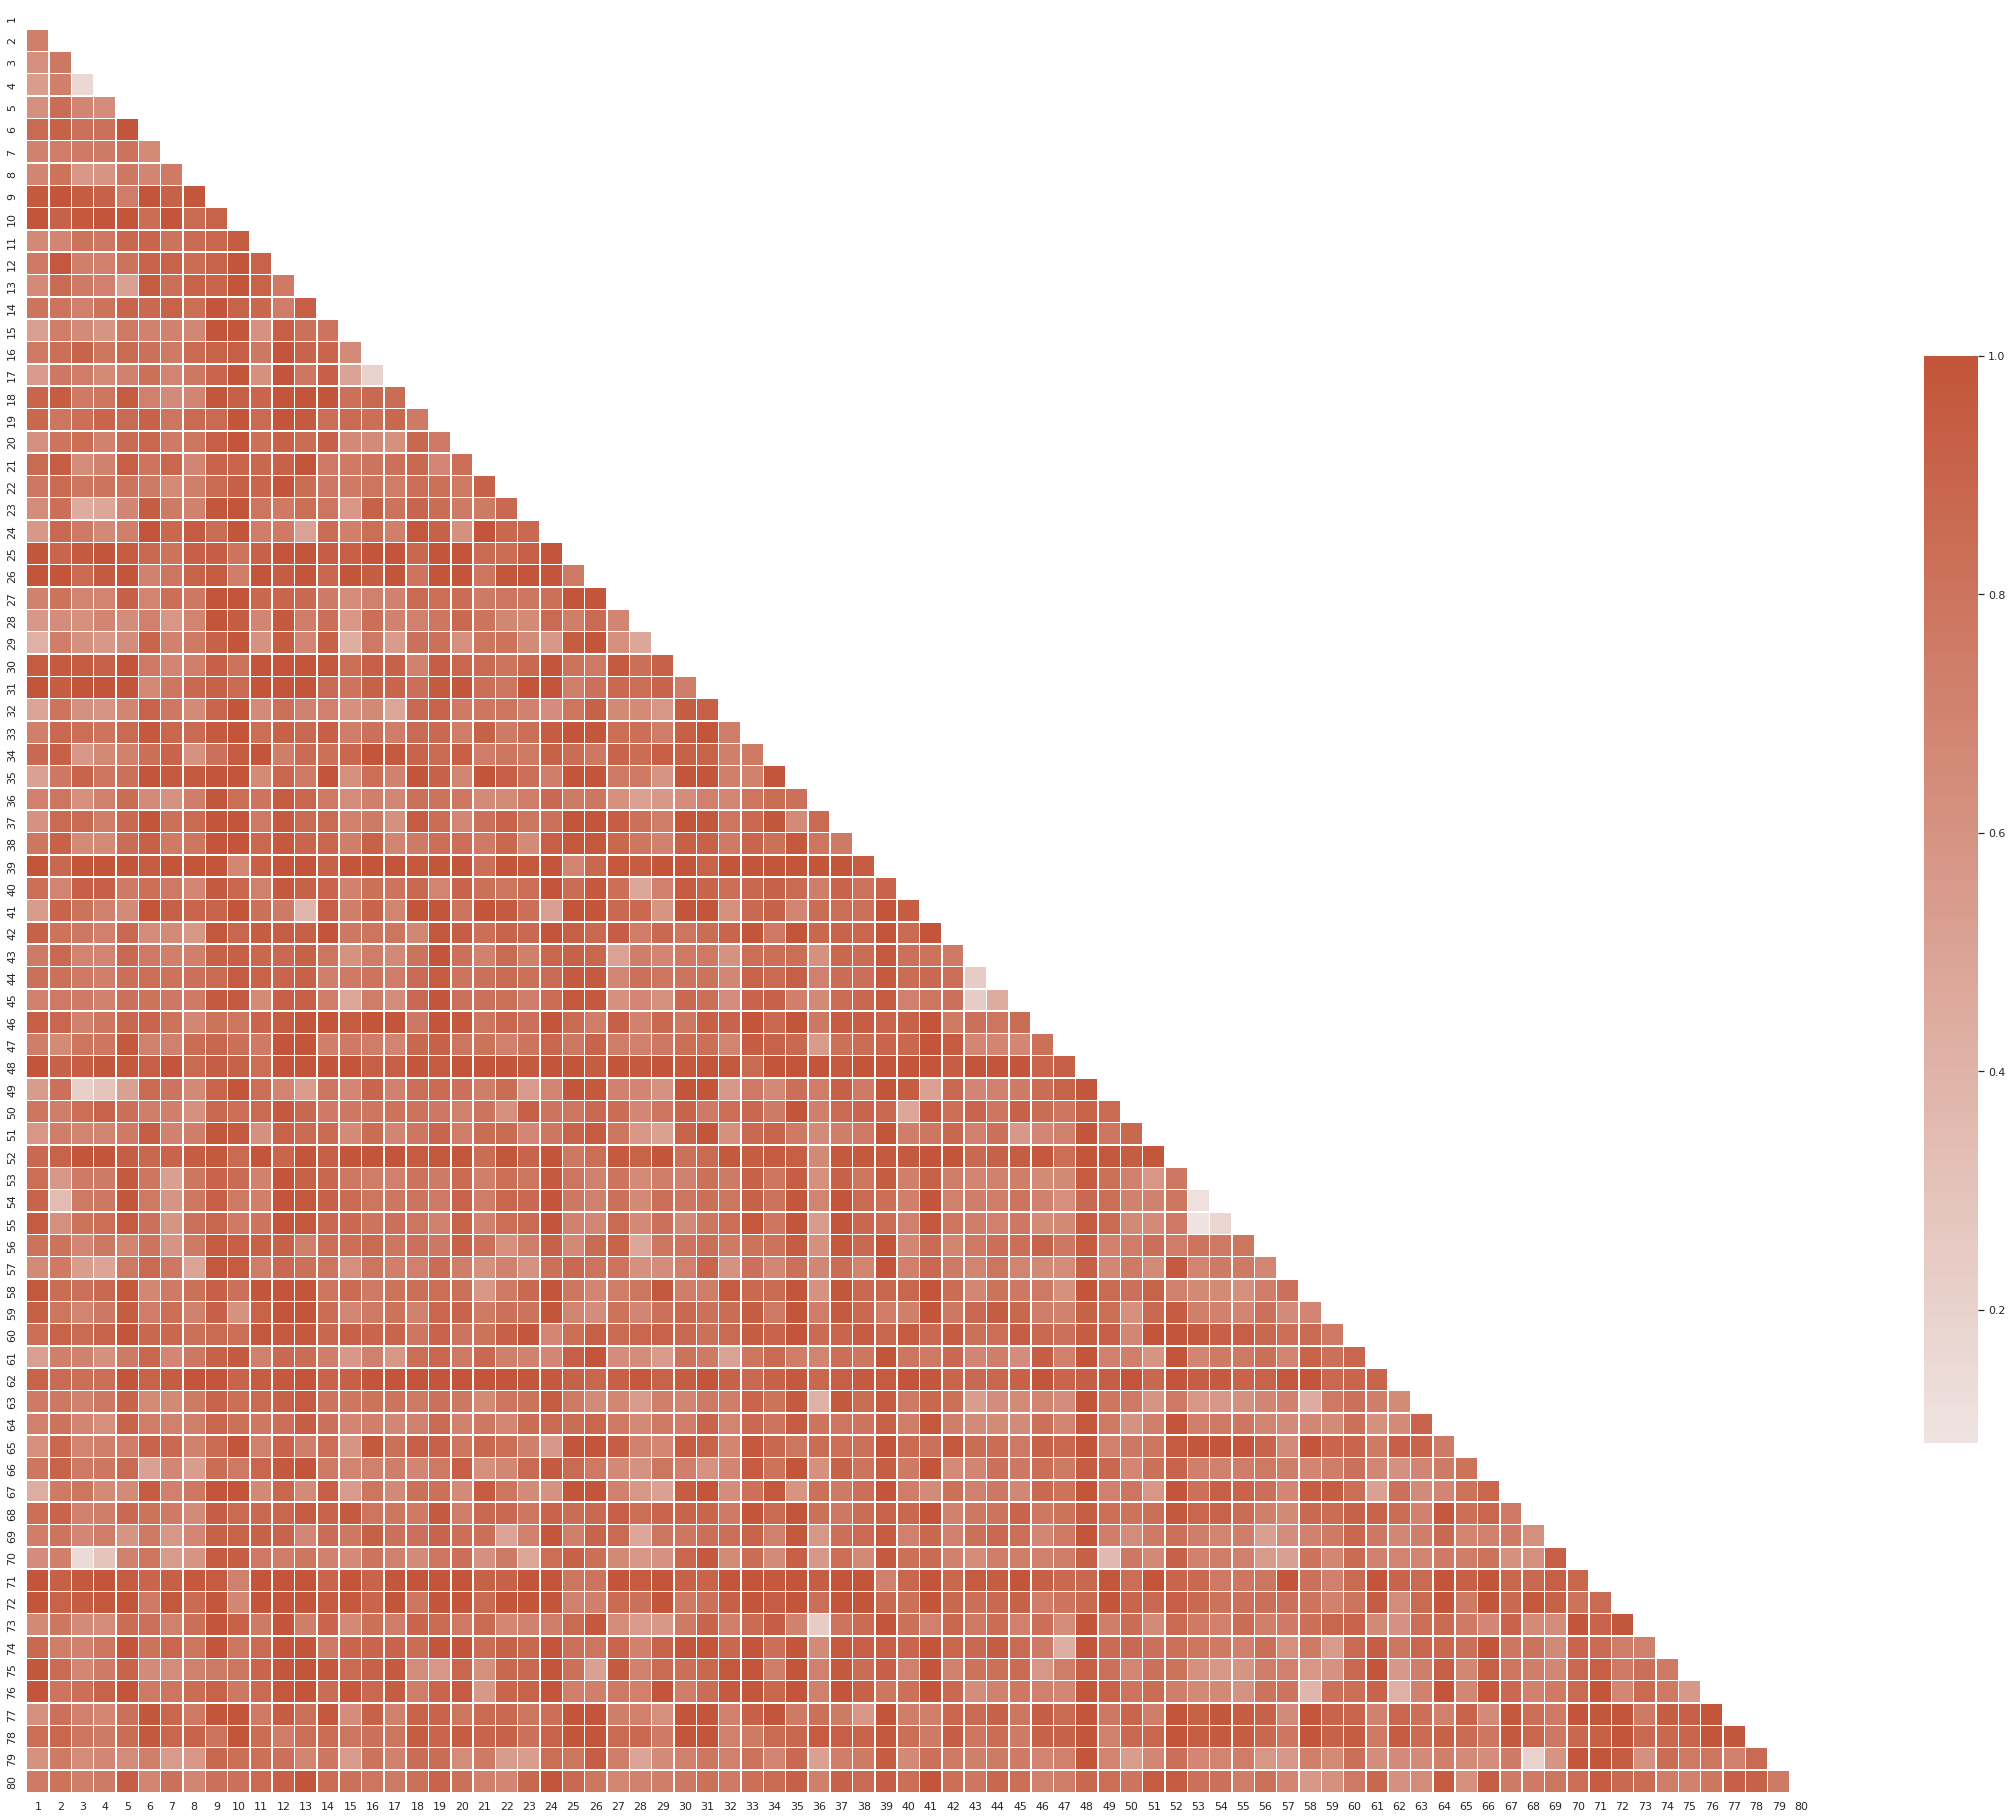

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d = pd.DataFrame(data=matOfDisGlove,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('./RSA.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

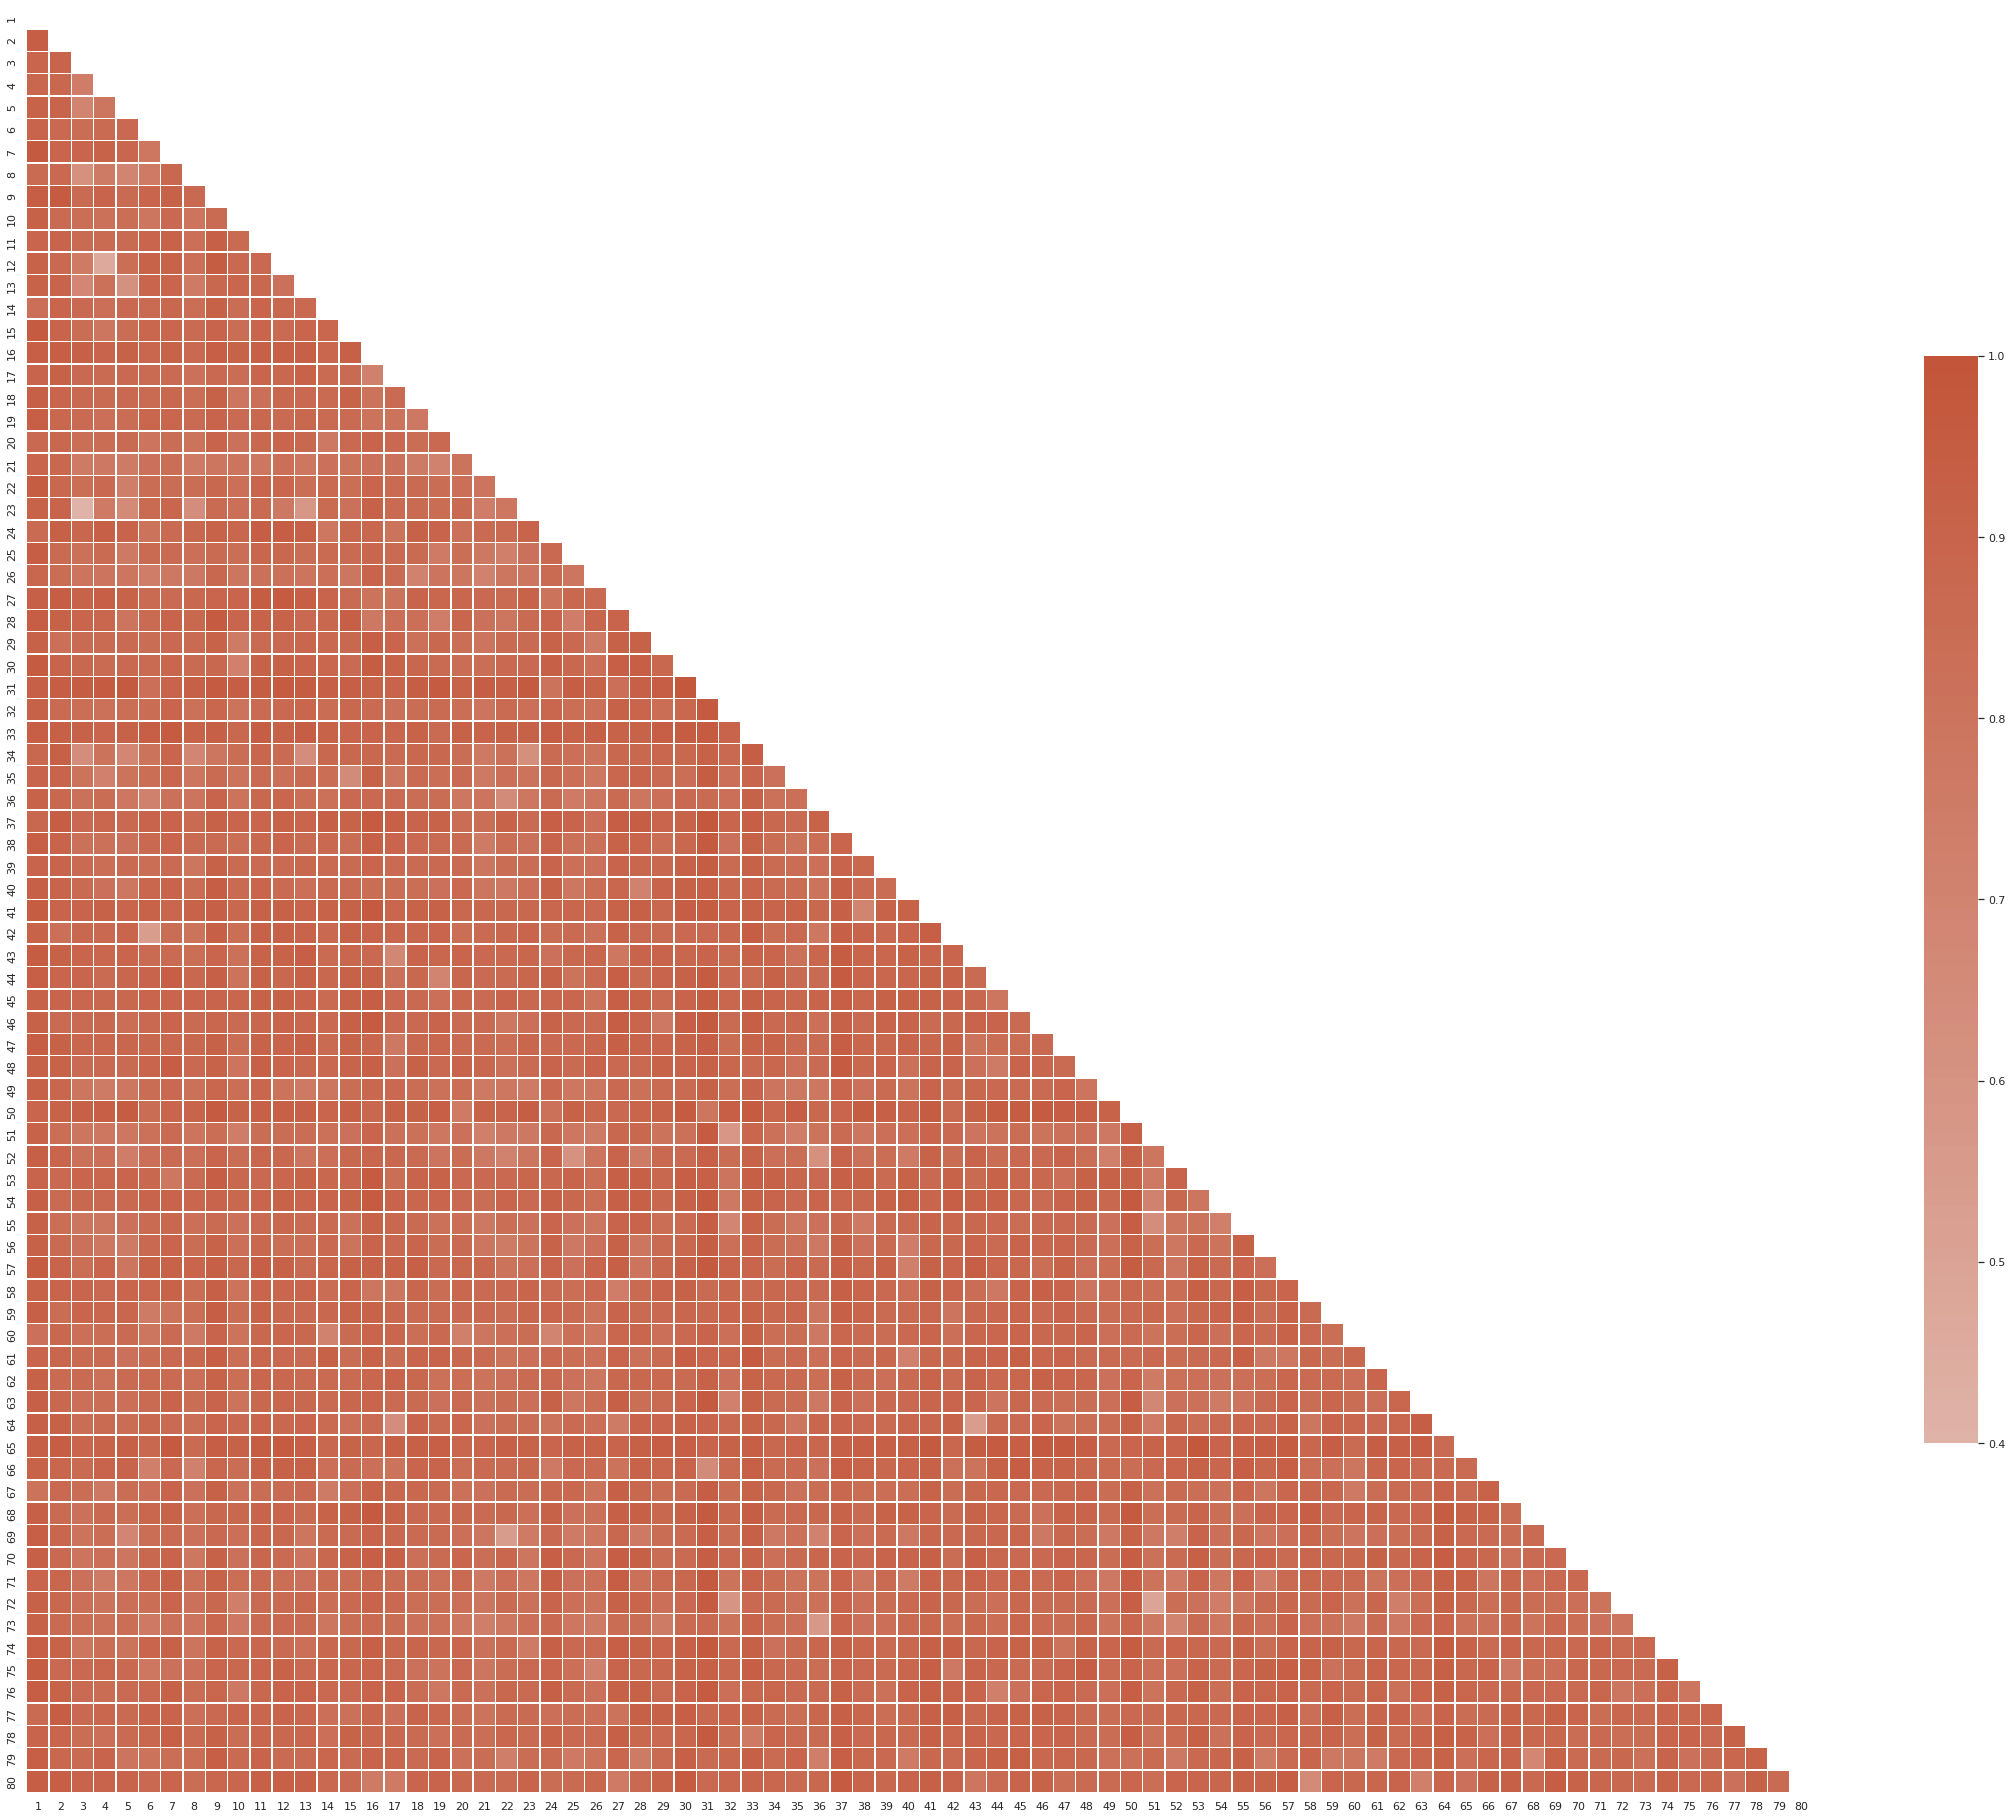

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d = pd.DataFrame(data=matOfDisFeat,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

d.to_csv('./RSA.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
features.head()

,Object Name,Portuguese feature,English feature,Production frequency,Category,Concept per Feature (CPF),Disting,Distinct
0,ball_of_basket,um_objecto,an_object,16.0,taxonomic,77.0,ND,0.012987
1,ball_of_basket,associado_a_pessoas_altas,associated_with_tall_people,7.0,encyclopaedic,1.0,D,1.000000
2,ball_of_basket,associado_a_equipas,associated_with_teams,10.0,encyclopaedic,1.0,D,1.000000
3,ball_of_basket,várias_cores,different_colors,9.0,visual-colour,46.0,ND,0.021739
4,ball_of_basket,tem_riscas_pretas,has_black_stripes,23.0,visual-form_and_surface,1.0,D,1.000000


In [ ]:
features.head()

,Object Name,Portuguese feature,English feature,Production frequency,Category,Concept per Feature (CPF),Disting,Distinct,Portuguese ObjNam
1331,opener_bottle,usa-se/agarra-se_com_as_mãos,used/held_with_your_hands,28.0,action,77.0,ND,0.012987,abre_caricas
1327,opener_bottle,é_pequeno,is_small,29.0,visual-form_and_surface,66.0,ND,0.015152,abre_caricas
1322,opener_bottle,encontra-se_em_cafés,found_in_cafes,7.0,encyclopaedic,1.0,D,1.000000,abre_caricas
1324,opener_bottle,tem_um_cabo,has_a_handle,13.0,visual-form_and_surface,36.0,ND,0.027778,abre_caricas
1325,opener_bottle,tem_um_buraco,has_a_hole,14.0,visual-form_and_surface,6.0,ND,0.166667,abre_caricas


In [ ]:
# RSA for actions

In [ ]:
matOfDisAct = np.empty([len(lOfObjectsAct), len(lOfObjectsAct)])

i = 0
j = 0
for e in lOfObjectsAct:
  for item in lSimDisObj2:
    if i == j:
        matOfDisAct[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        matOfDisAct[i, j] = 1 - (item['lenSim'] / (item['lenSim'] + item['lenDis1'] + item['lenDis2']))
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
matOfDisAct[23, 28]

0.6666666666666667

In [ ]:
matOfDisGloveAct = np.empty([len(lOfObjectsAct), len(lOfObjectsAct)])

i = 0
j = 0
for e in lOfObjectsAct:
  for item in lSimDisObj2:
    if i == j:
        matOfDisGlove[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        similarity = word_vectors.n_similarity(item['obj1'], item['obj2'])  
        matOfDisGloveAct[i, j] = 1 - similarity
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
matOfDisGloveAct[23, 28]

1.0449903085827827

In [ ]:
RSA2 = RSA_spearman(matOfDisGloveAct, matOfDisAct)

In [ ]:
RSA2

0.06184439200236149

In [ ]:
# RSA with Portuguese words

In [ ]:
portDict = {}
port = [ 
 'abre_caricas',
 'afia-lapis',
 'agrafador',
 'agulha',
 'alicate',
 'apagador',
 'apito',
 'balde',
 'batedeira',
 'berbequim',
 'boia',
 'bola_basquete',
 'borracha',
 'borrifador',
 'broca',
 'buzina',
 'cabide',
 'cana_pesca',
 'canivete',
 'carimbo',
 'carrinho_compras',
 'castical',
 'chave',
 'chave_inglesa',
 'chavena',
 'clip',
 'colher',
 'colher_pau',
 'copo',
 'corta_unhas',
 'dardo',
 'descascador',
 'desentupidor',
 'enxada',
 'escova_cabelo',
 'escova_dentes',
 'esfregona',
 'esponja',
 'espremedor',
 'faca',
 'fosforo',
 'furador',
 'garfo',
 'garrafa',
 'guardanapo',
 'isqueiro',
 'jarro',
 'lanterna',
 'lapis',
 'leque',
 'lima',
 'lupa',
 'manipulo_da_porta',
 'maquina_de_barbear',
 'martelo',
 'moedor_pimenta',
 'mola_roupa',
 'pa',
 'parafuso',
 'peso',
 'piao',
 'pinca',
 'pincel',
 'prego',
 'quebra_nozes',
 'ralador',
 'raquete',
 'rato_pc',
 'remo',
 'rolha',
 'rolo_massa',
 'saco_pasteleiro',
 'secador',
 'seringa',
 'taco_golfe',
 'tampa_garrafa',
 'tesoura',
 'tigela',
 'varinha_magica',
 'vassoura']
eng = ['opener_bottle',
 'pencil_sharpener',
 'stapler',
 'needle',
 'pliers',
 'board_eraser',
 'whistle',
 'bucket',
 'manual_mixer',
 'drill',
 'life_buoy',
 'ball_of_basket',
 'pencil_eraser',
 'spray_bottle',
 'drill_bit',
 'horn',
 'hanger',
 'fishing_rod',
 'swiss_knife',
 'ruber_stamp',
 'shopping_cart',
 'candlestick',
 'key',
 'wrench',
 'cup',
 'paper_clip',
 'Spoon',
 'wooden_spoon',
 'glass',
 'nail_clipper',
 'dart',
 'peeler',
 'plunger',
 'hoe',
 'hairbrush',
 'toothbrush',
 'mop',
 'sponge',
 'squeezer',
 'Knife',
 'match',
 'hole_punch',
 'fork',
 'bottle',
 'napkin',
 'lighter',
 'jug',
 'flashlight',
 'pencil',
 'hand_fan',
 'nail_file',
 'magnifier',
 'door_handle',
 'electric_shaver',
 'hammer',
 'pepper_grinder',
 'clothespin',
 'shovel',
 'screw',
 'Weight',
 'spinning_top',
 'tweezers',
 'brush',
 'nail',
 'nutcracker',
 'grater',
 'racquet',
 'computer_mouse',
 'paddle',
 'cork',
 'rolling_pin',
 'piping_bag',
 'dryer',
 'syringe',
 'golf_club',
 'bottle_cap',
 'scissors',
 'bowl',
 'hand_blender',
 'broom']

portDict = dict(zip(eng, port))

In [ ]:
features['Portuguese ObjNam'] = features['Object Name'] 
features = features.replace({"Portuguese ObjNam" : portDict})

In [ ]:
features.head()

,Object Name,Portuguese feature,English feature,Production frequency,Category,Concept per Feature (CPF),Disting,Distinct,Portuguese ObjNam
1331,opener_bottle,usa-se/agarra-se_com_as_mãos,used/held_with_your_hands,28.0,action,77.0,ND,0.012987,abre_caricas
1318,opener_bottle,várias_cores,different_colors,7.0,visual-colour,46.0,ND,0.021739,abre_caricas
1333,opener_bottle,usado_para_bebidas,used_for_drinks,10.0,function,6.0,ND,0.166667,abre_caricas
1334,opener_bottle,serve_para_abrir,used_for_opening,65.0,function,4.0,ND,0.250000,abre_caricas
1335,opener_bottle,serve_para_abrir_garrafas,used_for_opening_bottles,47.0,function,1.0,D,1.000000,abre_caricas


In [ ]:
features = features.sort_values(by=['Portuguese ObjNam'])
features.head()

,Object Name,Portuguese feature,English feature,Production frequency,Category,Concept per Feature (CPF),Disting,Distinct,Portuguese ObjNam
1331,opener_bottle,usa-se/agarra-se_com_as_mãos,used/held_with_your_hands,28.0,action,77.0,ND,0.012987,abre_caricas
1327,opener_bottle,é_pequeno,is_small,29.0,visual-form_and_surface,66.0,ND,0.015152,abre_caricas
1322,opener_bottle,encontra-se_em_cafés,found_in_cafes,7.0,encyclopaedic,1.0,D,1.000000,abre_caricas
1324,opener_bottle,tem_um_cabo,has_a_handle,13.0,visual-form_and_surface,36.0,ND,0.027778,abre_caricas
1325,opener_bottle,tem_um_buraco,has_a_hole,14.0,visual-form_and_surface,6.0,ND,0.166667,abre_caricas


In [ ]:
SimDisObjPort = []
for subset in itertools.permutations(list(features['Object Name'].unique()), 2):
  if str(subset[0]) != 'nan' and str(subset[1]) != 'nan' \
  and subset[0] != 'pencil ' and subset[1] != 'pencil ' and subset[0] != 'scissors ' and subset[1] != 'scissors ':
    dictOfSimDis = {}
    if '/' in subset[0]:  
      dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    elif '/' in subset[1]:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].split('/')[0].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    else:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])

    EngFeat1 = features[features['Object Name'] == subset[0]]['English feature '].unique()
    EngFeat2 = features[features['Object Name'] == subset[1]]['English feature '].unique()
    dissimilarities1 = list(set(EngFeat1) - set(EngFeat2))
    dissimilarities2 = list(set(EngFeat2) - set(EngFeat1))
    similarities = list(set(EngFeat1) & set(EngFeat2))
    lenDis1 = len(dissimilarities1)
    lenDis2 = len(dissimilarities2)
    lenSim = len(similarities)

    dictOfSimDis['dis1'] = dissimilarities1
    dictOfSimDis['dis2'] = dissimilarities2
    dictOfSimDis['sim'] = similarities
    dictOfSimDis['lenDis1'] = lenDis1
    dictOfSimDis['lenDis2'] = lenDis2
    dictOfSimDis['lenSim'] = lenSim
    dictOfSimDis['portName1'] = features[features['Object Name'] == subset[0]]['Portuguese ObjNam'].unique()
    dictOfSimDis['portName2'] = features[features['Object Name'] == subset[1]]['Portuguese ObjNam'].unique()

    SimDisObjPort.append(dictOfSimDis)

In [ ]:
sortedList = [x.lower().strip().split('_') for _, x in sorted(zip(port, eng))]

In [ ]:
len(sortedList)

80

In [ ]:
DisFeat = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisObjPort:
    if i == j:
        DisFeat[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        DisFeat[i, j] = 1 - (item['lenSim'] / (item['lenSim'] + item['lenDis1'] + item['lenDis2']))
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
DisGlove = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisObjPort:
    if i == j:
        DisGlove[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        similarity = word_vectors.n_similarity(item['obj1'], item['obj2'])  
        DisGlove[i, j] = 1 - similarity
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
RSA_spearman(DisGlove, DisFeat)

0.1331054554367668

In [ ]:
# load ResNet50 data

In [ ]:
from numpy import genfromtxt
conv1 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/conv1.csv', delimiter=',')
bn1 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/bn1.csv', delimiter=',')
avgpool = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/avgpool.csv', delimiter=',')
relu = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/relu.csv', delimiter=',')
layer1 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/layer1.csv', delimiter=',')
layer2 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/layer2.csv', delimiter=',')
layer3 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/layer3.csv', delimiter=',')
layer4 = genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/layer4.csv', delimiter=',')
maxpool =  genfromtxt('/content/drive/MyDrive/behavioral_data/ResNet50/maxpool.csv', delimiter=',')

In [ ]:
# RSA glove and ResNet50

In [ ]:
RSA_spearman(DisGlove, conv1)

0.07384622918015432

In [ ]:
RSA_spearman(DisGlove, bn1)

0.07037466785035461

In [ ]:
RSA_spearman(DisGlove, avgpool)

0.06200956567461343

In [ ]:
RSA_spearman(DisGlove, relu)

0.08076960333644048

In [ ]:
RSA_spearman(DisGlove, layer1)

0.07918648068046147

In [ ]:
RSA_spearman(DisGlove, layer2)

0.0811562289807545

In [ ]:
RSA_spearman(DisGlove, layer3)

0.08289952160294158

In [ ]:
RSA_spearman(DisGlove, layer4)

0.07072854823662093

In [ ]:
RSA_spearman(DisGlove, maxpool)

0.07858606772847394

In [ ]:
#  RSA Features and ResNet50

In [ ]:
RSA_spearman(DisFeat, conv1)

-0.00219282945372849

In [ ]:
RSA_spearman(DisFeat, bn1)

-0.004254782301285394

In [ ]:
RSA_spearman(DisFeat, avgpool)

-0.028290510595569366

In [ ]:
RSA_spearman(DisFeat, relu)

0.0010440604523730228

In [ ]:
RSA_spearman(DisFeat, layer1)

-0.004406717792767523

In [ ]:
RSA_spearman(DisFeat, layer2)

-0.0017571516104304408

In [ ]:
RSA_spearman(DisFeat, layer3)

-0.0036376769430946218

In [ ]:
RSA_spearman(DisFeat, layer4)

-0.01782727115494717

In [ ]:
RSA_spearman(DisFeat, maxpool)

-0.0017053703778275673

In [ ]:
# load all behavioral fMRI data

In [ ]:
import scipy.io as sio
mat = sio.loadmat('/content/drive/MyDrive/behavioral_data/RDMsAll/allModelRDMsTogether.mat')

In [ ]:
item1 = mat.popitem()

In [ ]:
item2 = mat.popitem()

In [ ]:
item3 = mat.popitem()

In [ ]:
item4 = mat.popitem()

In [ ]:
item1[1][0][0][1][0].split('|')[0]

'F_DL '

In [ ]:
F_DL = item1[1][0][0][0]
F_DL.shape

(80, 80)

In [ ]:
item1[1][0][1][1][0].split('|')[0]

'M_DL '

In [ ]:
M_DL = item1[1][0][1][0]
M_DL.shape

(80, 80)

In [ ]:
item1[1][0][2][1][0].split('|')[0]

'V_DL '

In [ ]:
V_DL = item1[1][0][2][0]
V_DL.shape

(80, 80)

In [ ]:
item1[1][0][3][1][0].split('|')[0]

'F_Feats '

In [ ]:
F_Feats = item1[1][0][3][0]
F_Feats.shape

(80, 80)

In [ ]:
item1[1][0][4][1][0].split('|')[0]

'M_Feats '

In [ ]:
M_Feats = item1[1][0][4][0]
M_Feats.shape

(80, 80)

In [ ]:
item1[1][0][5][1][0].split('|')[0]

'V_Feats '

In [ ]:
V_Feats = item1[1][0][5][0]
V_Feats.shape

(80, 80)

In [ ]:
item1[1][0][6][1][0].split('|')[0]

'All_Feats '

In [ ]:
All_Feats = item1[1][0][6][0]
All_Feats.shape

(80, 80)

In [ ]:
item1[1][0][7][1][0].split('|')[0]

'FUN_IMDS'

In [ ]:
FUN_IMDS = item1[1][0][7][0]
FUN_IMDS.shape

(80, 80)

In [ ]:
item1[1][0][8][1][0].split('|')[0]

'MAN_IMDS'

In [ ]:
MAN_IMDS = item1[1][0][8][0]
MAN_IMDS.shape

(80, 80)

In [ ]:
item1[1][0][9][1][0].split('|')[0]

'VIS_IMDS'

In [ ]:
VIS_IMDS = item1[1][0][9][0]
VIS_IMDS.shape

(80, 80)

In [ ]:
# RSA loaded behavioural data and Glove

In [ ]:
RSA_spearman(DisGlove, F_DL)

0.0550069473639628

In [ ]:
RSA_spearman(DisGlove, M_DL)

0.0420259290020002

In [ ]:
RSA_spearman(DisGlove, V_DL)

0.0491378092119241

In [ ]:
RSA_spearman(DisGlove, F_Feats)

0.0927814134540525

In [ ]:
RSA_spearman(DisGlove, M_Feats)

-0.006237536791320583

In [ ]:
RSA_spearman(DisGlove, V_Feats)

0.034127493771681956

In [ ]:
RSA_spearman(DisGlove, All_Feats)

0.07876934743094632

In [ ]:
RSA_spearman(DisGlove, FUN_IMDS)

0.0938037992054266

In [ ]:
RSA_spearman(DisGlove, MAN_IMDS)

0.04207527613783665

In [ ]:
RSA_spearman(DisGlove, VIS_IMDS)

-0.0015563058089145027

In [ ]:
# RSA loaded behavioural data and similarities

In [ ]:
RSA_spearman(DisFeat, F_DL)

0.14569527606539567

In [ ]:
RSA_spearman(DisFeat, M_DL)

0.09355376722023767

In [ ]:
RSA_spearman(DisFeat, V_DL)

0.12948951015605525

In [ ]:
RSA_spearman(DisFeat, F_Feats)

0.13235524637730103

In [ ]:
RSA_spearman(DisFeat, M_Feats)

0.03067077732554428

In [ ]:
RSA_spearman(DisFeat, V_Feats)

0.23059636257334115

In [ ]:
RSA_spearman(DisFeat, All_Feats)

0.24249754181706687

In [ ]:
RSA_spearman(DisFeat, FUN_IMDS)

0.12607599895205202

In [ ]:
RSA_spearman(DisFeat, MAN_IMDS)

0.08575182662250924

In [ ]:
RSA_spearman(DisGlove, VIS_IMDS)

-0.0015563058089145027

In [ ]:
# RSA ResNet50 and behavioural data

In [ ]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [ ]:
l1 = [F_DL, M_DL, V_DL, F_Feats, M_Feats, V_Feats, All_Feats, VIS_IMDS, FUN_IMDS, MAN_IMDS]
l2 = [conv1, bn1, avgpool, relu, maxpool, layer1, layer2, layer3, layer4]
for e1 in l1:
  for e2 in l2:
    rsa = RSA_spearman(e1, e2)
    print('RSA of ', namestr(e1, globals())[-2], ' and ', namestr(e2, globals())[-2], ' = ', rsa)

RSA of  F_DL  and  conv1  =  0.00797984323821045
RSA of  F_DL  and  bn1  =  0.009079899995719442
RSA of  F_DL  and  avgpool  =  0.0006757801365662966
RSA of  F_DL  and  relu  =  0.007512426592688556
RSA of  F_DL  and  maxpool  =  0.0036653214075317493
RSA of  F_DL  and  layer1  =  0.002528049076760997
RSA of  F_DL  and  layer2  =  -0.0032820067162429548
RSA of  F_DL  and  layer3  =  -0.004197504187976497
RSA of  F_DL  and  layer4  =  -0.0003089553751149271
RSA of  M_DL  and  conv1  =  0.04472429258321819
RSA of  M_DL  and  bn1  =  0.04129309914071497
RSA of  M_DL  and  avgpool  =  0.046855735761588406
RSA of  M_DL  and  relu  =  0.050107634865220706
RSA of  M_DL  and  maxpool  =  0.042493869914475534
RSA of  M_DL  and  layer1  =  0.03949096851112951
RSA of  M_DL  and  layer2  =  0.0474937116150913
RSA of  M_DL  and  layer3  =  0.045391830655417034
RSA of  M_DL  and  layer4  =  0.04516369928626214
RSA of  V_DL  and  conv1  =  0.03071805706133633
RSA of  V_DL  and  bn1  =  0.031702190301

In [ ]:
# repeat RSA for actions

In [ ]:
actions['Portuguese ObjNam'] = actions['Object Name'] 
actions = actions.replace({"Portuguese ObjNam" : portDict})
actions = actions.sort_values(by=['Portuguese ObjNam'])
actions.head()

,Object Name,Portuguese feature,English feature,Production frequency,Concepts per Feature (CPF),Disting,Distinct,Portuguese ObjNam
628,opener_bottle,movimento_do_pulso,wrist_movement,3.0,15.0,ND,0.066667,abre_caricas
631,opener_bottle,movimento_para_cima,moves_up,19.0,31.0,ND,0.032258,abre_caricas
626,opener_bottle,encaixa_na_carica,fits_on_bottle_caps,3.0,1.0,D,1.000000,abre_caricas
627,opener_bottle,movimento_de_agarrar,grasp_movement,9.0,80.0,ND,0.012500,abre_caricas
630,opener_bottle,movimento_palmar/com_a_mão_toda,full-hand/power_grasp,6.0,70.0,ND,0.014286,abre_caricas


In [ ]:
SimDisPortAct = []
for subset in itertools.permutations(list(actions['Object Name'].unique()), 2):
  if str(subset[0]) != 'nan' and str(subset[1]) != 'nan' \
  and subset[0] != 'bucket ' and subset[1] != 'bucket ' and subset[0] != 'bottle ' and subset[1] != 'bottle ':
    dictOfSimDis = {}
    if '/' in subset[0]:  
      dictOfSimDis['obj1'] = subset[0].split('/')[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    elif '/' in subset[1]:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].split('/')[0].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])
    else:
      dictOfSimDis['obj1'] = subset[0].lower().strip().split('_')
      dictOfSimDis['obj2'] = subset[1].lower().strip().split('_')
      dictOfSimDis['dissim'] = 1 - word_vectors.n_similarity(dictOfSimDis['obj1'], dictOfSimDis['obj2'])

    EngFeat1 = actions[actions['Object Name'] == subset[0]]['English feature '].unique()
    EngFeat2 = actions[actions['Object Name'] == subset[1]]['English feature '].unique()
    dissimilarities1 = list(set(EngFeat1) - set(EngFeat2))
    dissimilarities2 = list(set(EngFeat2) - set(EngFeat1))
    similarities = list(set(EngFeat1) & set(EngFeat2))
    lenDis1 = len(dissimilarities1)
    lenDis2 = len(dissimilarities2)
    lenSim = len(similarities)

    dictOfSimDis['dis1'] = dissimilarities1
    dictOfSimDis['dis2'] = dissimilarities2
    dictOfSimDis['sim'] = similarities
    dictOfSimDis['lenDis1'] = lenDis1
    dictOfSimDis['lenDis2'] = lenDis2
    dictOfSimDis['lenSim'] = lenSim
    dictOfSimDis['portName1'] = features[features['Object Name'] == subset[0]]['Portuguese ObjNam'].unique()
    dictOfSimDis['portName2'] = features[features['Object Name'] == subset[1]]['Portuguese ObjNam'].unique()

    SimDisPortAct.append(dictOfSimDis)

In [ ]:
DisFeatAct = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisPortAct:
    if i == j:
        DisFeatAct[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        DisFeatAct[i, j] = 1 - (item['lenSim'] / (item['lenSim'] + item['lenDis1'] + item['lenDis2']))
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
DisGloveAct = np.empty([len(sortedList), len(sortedList)])

i = 0
j = 0
for e in sortedList:
  for item in SimDisPortAct:
    if i == j:
        DisGloveAct[i, j] = 0 
        j = j + 1
    elif item['obj1'] == e:
        similarity = word_vectors.n_similarity(item['obj1'], item['obj2'])  
        DisGloveAct[i, j] = 1 - similarity
        j = j + 1
  j = 0
  i = i + 1

In [ ]:
l3 = [DisFeatAct, DisGloveAct]
for e1 in l1:
  for e3 in l3:
    rsa = RSA_spearman(e1, e3)
    print('RSA of ', namestr(e1, globals())[-2], ' and ', namestr(e3, globals())[-2], ' = ', rsa)

RSA of  F_DL  and  DisFeatAct  =  -0.030873006722328095
RSA of  F_DL  and  DisGloveAct  =  0.08889450679819456
RSA of  M_DL  and  DisFeatAct  =  0.044758949194219334
RSA of  M_DL  and  DisGloveAct  =  0.056075495362075435
RSA of  V_DL  and  DisFeatAct  =  0.03173900350840908
RSA of  V_DL  and  DisGloveAct  =  0.07468198136279713
RSA of  F_Feats  and  DisFeatAct  =  0.030385016572489525
RSA of  F_Feats  and  DisGloveAct  =  0.11124141346462604
RSA of  M_Feats  and  DisFeatAct  =  0.08908603243917024
RSA of  M_Feats  and  DisGloveAct  =  -0.008575954218626534
RSA of  V_Feats  and  DisFeatAct  =  0.050759259413759854
RSA of  V_Feats  and  DisGloveAct  =  0.018908151074971062
RSA of  All_Feats  and  DisFeatAct  =  0.009153391277886143
RSA of  All_Feats  and  DisGloveAct  =  0.06539523569185608
RSA of  VIS_IMDS  and  DisFeatAct  =  0.04046926398860663
RSA of  VIS_IMDS  and  DisGloveAct  =  0.011184432625498704
RSA of  FUN_IMDS  and  DisFeatAct  =  -0.04980276372003858
RSA of  FUN_IMDS  and 

In [ ]:
# analogies

In [ ]:
def analogy(x1, x2, y1):
    result = word_vectors.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('australia', 'beer', 'france')

'champagne'

In [ ]:
word_vectors.doesnt_match("metal fork hammer screw".split())


'fork'

In [ ]:
from sklearn.decomposition import PCA
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(40,40))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig('./content/test1.png')

In [ ]:
singlewords = []
for e in sortedList:
  if len(e) == 1:
    singlewords.append(e[0])
display_pca_scatterplot(word_vectors, singlewords)

In [ ]:
import numpy as np

In [ ]:
# end